In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_theme(style="darkgrid")

In [68]:
data = pd.read_csv("data/feature_engineering_done.csv")

In [69]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Private,workclass_Self-emp-not-inc,education_Assoc-acdm,...,marital-status_Never-married,marital-status_Widowed,occupation_Farming-fishing,occupation_Machine-op-inspct,occupation_Other-service,occupation_Protective-serv,relationship_Not-in-family,relationship_Own-child,race_White,gender_Male
0,25,226802,7,0,0,40,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,18,103497,10,0,0,30,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [70]:
np.var(data)

age                             1.838635e+02
fnlwgt                          7.574490e+09
educational-num                 4.856537e+00
capital-gain                    5.731098e+06
capital-loss                    1.550032e+05
hours-per-week                  9.497299e+01
income                          1.770639e-01
workclass_Private               1.803997e-01
workclass_Self-emp-not-inc      6.230797e-02
education_Assoc-acdm            3.317225e-02
education_HS-grad               2.241018e-01
marital-status_Never-married    2.264352e-01
marital-status_Widowed          2.970288e-02
occupation_Farming-fishing      2.108083e-02
occupation_Machine-op-inspct    5.847198e-02
occupation_Other-service        9.169420e-02
occupation_Protective-serv      1.997995e-02
relationship_Not-in-family      1.927673e-01
relationship_Own-child          1.399212e-01
race_White                      1.239056e-01
gender_Male                     2.283285e-01
dtype: float64

# Dropping Constant Features

In [71]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0.2)

In [72]:
var_thres.fit(data);
var_thres.variances_

array([1.83863482e+02, 7.57448981e+09, 4.85653666e+00, 5.73109842e+06,
       1.55003215e+05, 9.49729875e+01, 1.77063929e-01, 1.80399675e-01,
       6.23079669e-02, 3.31722501e-02, 2.24101758e-01, 2.26435218e-01,
       2.97028821e-02, 2.10808294e-02, 5.84719788e-02, 9.16941962e-02,
       1.99799548e-02, 1.92767344e-01, 1.39921173e-01, 1.23905559e-01,
       2.28328535e-01])

In [73]:
constant_columns = [col for col in data.columns if col not in data.columns[var_thres.get_support()] ]
constant_columns

['income',
 'workclass_Private',
 'workclass_Self-emp-not-inc',
 'education_Assoc-acdm',
 'marital-status_Widowed',
 'occupation_Farming-fishing',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Protective-serv',
 'relationship_Not-in-family',
 'relationship_Own-child',
 'race_White']

### Removing the constant features

In [74]:
len(data.columns)

21

In [75]:
len(constant_columns), constant_columns

(12,
 ['income',
  'workclass_Private',
  'workclass_Self-emp-not-inc',
  'education_Assoc-acdm',
  'marital-status_Widowed',
  'occupation_Farming-fishing',
  'occupation_Machine-op-inspct',
  'occupation_Other-service',
  'occupation_Protective-serv',
  'relationship_Not-in-family',
  'relationship_Own-child',
  'race_White'])

In [76]:
data.drop(columns=constant_columns[1:], axis=1, inplace=True) # Not dropping the income feature

In [77]:
len(data.columns)

10

In [78]:
data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,education_HS-grad,marital-status_Never-married,gender_Male
0,25,226802,7,0,0,40,0,0,1,1
1,38,89814,9,0,0,50,0,1,0,1
2,28,336951,12,0,0,40,1,0,0,1
3,44,160323,10,7688,0,40,1,0,0,1
4,18,103497,10,0,0,30,0,0,1,0


## Dropping features with High Correlation (Independent features)

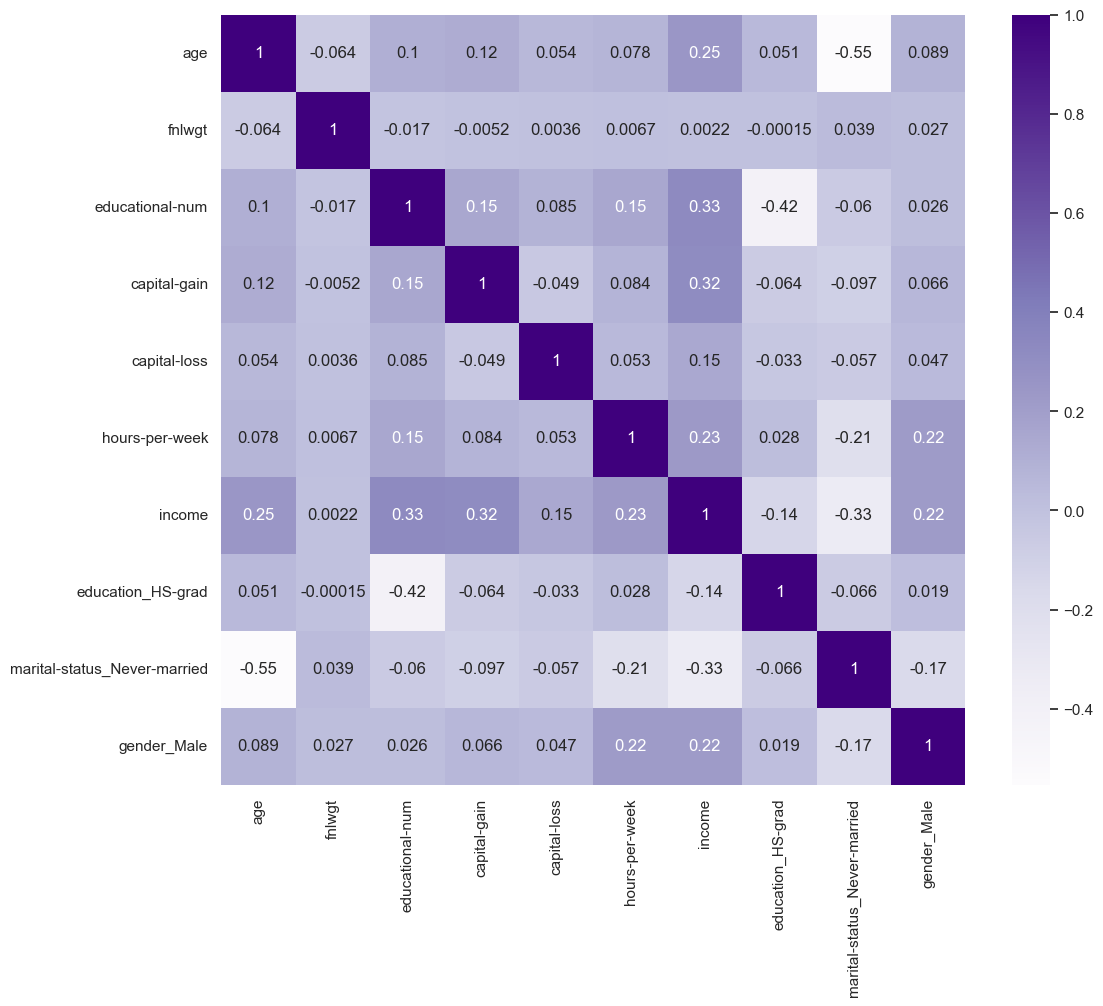

In [85]:
plt.figure(figsize=(12, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples);

In [86]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [92]:
correlation(data, 0.6)

set()

### Actually no features are that much correlated